In [1]:
#импортирование необходимых библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
from math import sqrt
%matplotlib inline

In [2]:
# зададим случайную величину по закону двойного распределения Вейбулла

#параметры распределения
k = 4.0
xm = 3.0

#frozen distribution
distributionRv = sts.pareto(k, loc=0, scale=xm)

# сгенерируем 1000 значений
distributionSample = distributionRv.rvs(1000)

#проверка задания распределения
print('Theoretical mean: ', distributionRv.mean())
print('Theoretical standard deviation: ', distributionRv.std())

Theoretical mean:  4.0
Theoretical standard deviation:  1.4142135623730951


Text(0, 0.5, 'pdf')

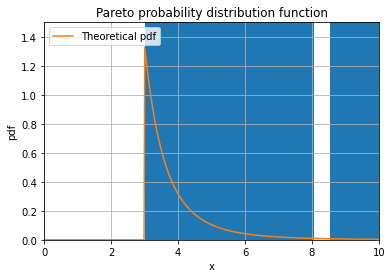

In [12]:
#гистограмма выборки
plt.hist(distributionSample, bins=30)

#теоретическая плотность распределения
x = np.linspace(0,20,1000)
pdf = distributionRv.pdf(x)
plt.plot(x, pdf, label='Theoretical pdf')
plt.legend()
plt.grid()
plt.axis([0, 10, 0, 1.5])
plt.title('Pareto probability distribution function')
plt.xlabel('x')
plt.ylabel('pdf')

In [16]:
#количество выборок
sampleNum = 1000

#массив объёма выборок
sampleVolume = [5, 10, 50]

#массив под выборочное среднее значение, заполненный нулями
distributionSamples = np.zeros( (len(sampleVolume), sampleNum) )

#вычисление выборочных средних значений и занесение в массив
for i in range( len(sampleVolume) ):
    for j in range(sampleNum):
        distributionSampleTemp = np.array( sts.pareto.rvs(k, loc=0, scale=xm, size=sampleVolume[i]) )
        distributionSampleTempMean = distributionSampleTemp.mean()
        distributionSamples[i, j] = distributionSampleTempMean
        
print(distributionSamples)

[[3.4507706  3.69363879 3.91393059 ... 3.97619918 3.94877382 3.57593594]
 [4.31933976 3.84629726 3.87706375 ... 3.62533866 3.83907302 3.60525418]
 [3.78906902 4.32778169 4.13146666 ... 4.05334417 4.30214251 4.28695993]]


AttributeError: 'Rectangle' object has no property 'normed'

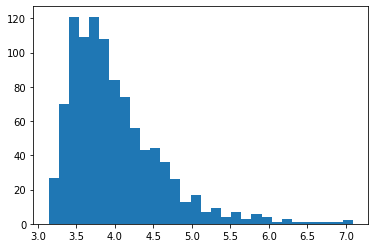

In [19]:
#гистограммы выборки
for i in range( len(sampleVolume) ):
    plt.hist(distributionSamples[i], bins=30, normed=True)
    plt.grid()
    plt.axis([2, 8, 0, 2.5])
    plt.title('Pareto probability distribution function for n = ' + str(sampleVolume[i]))
    plt.xlabel('x')
    plt.ylabel('pdf')
    plt.show()
    
for i in range( len(sampleVolume) ):
    plt.hist(distributionSamples[i], bins=30, normed=True, label='n = ' + str(sampleVolume[i]))
    plt.grid()
    plt.axis([2, 8, 0, 2.5])
    plt.title('Pareto probability distribution function')
    plt.legend()
    plt.xlabel('x')
    plt.ylabel('pdf')

In [20]:
#Математическое ожидание и дисперсия

distributionSampleMean = k * xm / (k - 1)
distributionSampleVariance = np.zeros( len(sampleVolume) )
for i in range( len(sampleVolume) ):
    distributionSampleVariance[i] = xm**2 * k / ( (k - 1)**2 * (k - 2) ) / sampleVolume[i]
    
print('Математическое ожидание: ' + str(distributionSampleMean))
for i in range( len(sampleVolume) ):
    print('Дисперсия для n = ' + str(sampleVolume[i]) + ': ' + str(distributionSampleVariance[i]))

Математическое ожидание: 4.0
Дисперсия для n = 5: 0.4
Дисперсия для n = 10: 0.2
Дисперсия для n = 50: 0.04


AttributeError: 'Rectangle' object has no property 'normed'

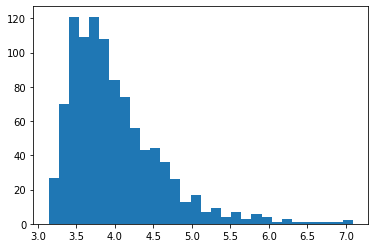

In [23]:
#гистограммы выборки
for i in range( len(sampleVolume) ):
    plt.hist(distributionSamples[i], bins=30, normed=True)
    plt.grid()
    plt.axis([2, 8, 0, 2.5])
    plt.title('Pareto probability distribution function for n = ' + str(sampleVolume[i]))
    plt.xlabel('x')
    plt.ylabel('pdf')
    
    # зададим нормально распределенную случайную величину
    mu = distributionSampleMean
    sigma = sqrt(distributionSampleVariance[i])
    normRv = sts.norm(loc=mu, scale=sigma)    
    x = np.linspace(-10,10,1000)
    pdf = normRv.pdf(x)
    plt.plot(x, pdf)
    plt.show()
    
for i in range( len(sampleVolume) ):
    plt.hist(distributionSamples[i], bins=30, normed=True, label='n = ' + str(sampleVolume[i]))
    plt.grid()
    plt.axis([2, 8, 0, 2.5])
    plt.title('Pareto probability distribution function')
    plt.legend()
    plt.xlabel('x')
    plt.ylabel('pdf')
    
    # зададим нормально распределенную случайную величину
    mu = distributionSampleMean
    sigma = sqrt(distributionSampleVariance[i])
    normRv = sts.norm(loc=mu, scale=sigma)    
    x = np.linspace(-10,10,1000)
    pdf = normRv.pdf(x)
    plt.plot(x, pdf)